# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Deep Learning
## Topic   : Stock Price Prediction with LSTM

# Tasks
DESCRIPTION

Forecasting stock prices has been a difficult task for many of the researchers and analysts. There are a lot of complicated financial indicators, as a result of which the fluctuation of the stock market is highly volatile. The prediction of the market value is of great importance to help in maximizing the profit of stock option purchase while keeping the risk low.
Objective:

Use LSTM approach to predict stock market indices on the dataset prices.csv.

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [10]:
prices_df =  pd.read_csv('prices.csv', header=0)
prices_df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [13]:
yahoo = prices_df[prices_df['symbol']=='YHOO']
yahoo_stk_prices = yahoo.close.values.astype('float32')
yahoo_stk_prices = yahoo_stk_prices.reshape(1762, 1)
yahoo_stk_prices.shape

(1762, 1)

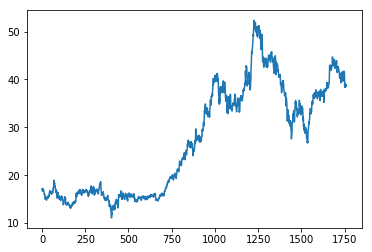

In [14]:
plt.plot(yahoo_stk_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stk_prices = scaler.fit_transform(yahoo_stk_prices)

In [15]:
train_size = int(len(yahoo_stk_prices) * 0.80)
test_size = len(yahoo_stk_prices) - train_size
train, test = yahoo_stk_prices[0:train_size,:], yahoo_stk_prices[train_size:len(yahoo_stk_prices),:]
print(len(train), len(test))

1409 353


In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

C:\Users\atul.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
C:\Users\atul.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  import sys


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
compilation time :  0.06800222396850586


C:\Users\atul.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [20]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

Instructions for updating:
Use tf.cast instead.


C:\Users\atul.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1336 samples, validate on 71 samples
Epoch 1/10
1336/1336 [==============================] - 9s 7ms/step - loss: 0.1313 - val_loss: 0.2901
Epoch 2/10
1336/1336 [==============================] - 0s 107us/step - loss: 0.0691 - val_loss: 0.1373
Epoch 3/10
1336/1336 [==============================] - 0s 141us/step - loss: 0.0404 - val_loss: 0.0616
Epoch 4/10
1336/1336 [==============================] - 0s 102us/step - loss: 0.0305 - val_loss: 0.0446
Epoch 5/10
1336/1336 [==============================] - 0s 117us/step - loss: 0.0197 - val_loss: 0.0201
Epoch 6/10
1336/1336 [==============================] - 0s 114us/step - loss: 0.0102 - val_loss: 0.0128
Epoch 7/10
1336/1336 [==============================] - 0s 111us/step - loss: 0.0042 - val_loss: 7.6210e-04
Epoch 8/10
1336/1336 [==============================] - 0s 105us/step - loss: 0.0019 - val_loss: 8.8099e-04
Epoch 9/10
1336/1336 [==============================] - 0s 114us/step - loss: 0.0019 - val_loss: 3.4104e-04
Epoch 10

[[0.6278401]]
[[1.5144114]]
[[3.608111]]
[[8.474839]]
[[15.175984]]
[[ 37.00724 ]
 [ 73.604904]
 [160.03282 ]
 [360.93134 ]
 [637.5546  ]]


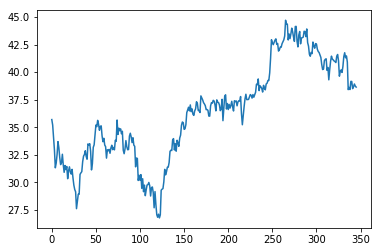

In [21]:
def plt_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict length consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plt_results_multiple(predictions, testY, predict_length)

# End Of Practice Project